In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the Dataset
df = pd.read_csv('/content/OCD Patient Dataset_ Demographics & Clinical Data.csv')


In [3]:
print(df.head())

   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180                NaN   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related        Checking   
1           

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [5]:
df.index


RangeIndex(start=0, stop=1500, step=1)

In [6]:
df.shape

(1500, 17)

In [7]:
df.describe

<bound method NDFrame.describe of       Patient ID  Age  Gender  Ethnicity Marital Status  Education Level  \
0           1018   32  Female    African         Single     Some College   
1           2406   69    Male    African       Divorced     Some College   
2           1188   57    Male   Hispanic       Divorced   College Degree   
3           6200   27  Female   Hispanic        Married   College Degree   
4           5824   56  Female   Hispanic        Married      High School   
...          ...  ...     ...        ...            ...              ...   
1495        5374   38    Male   Hispanic       Divorced   College Degree   
1496        5013   19  Female   Hispanic       Divorced  Graduate Degree   
1497        6089   40    Male      Asian        Married     Some College   
1498        3808   37  Female  Caucasian        Married     Some College   
1499        2221   18    Male  Caucasian         Single      High School   

     OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0            2016-07-15                            203                MDD   
1            2017-04-28                            180                NaN   
2            2018-02-02                            173                MDD   
3            2014-08-25                            126               PTSD   
4            2022-02-20                            168               PTSD   
...                 ...                            ...                ...   
1495         2019-01-10                             53                MDD   
1496         2022-09-14                            160                GAD   
1497         2018-03-13                            100                NaN   
1498         2018-04-14                            210                GAD   
1499         2020-12-23                             91                NaN   

     Family History of OCD Obsession Type Compulsion Type  \
0                       No   Harm-related        Checking   
1                      Yes   Harm-related         Washing   
2                       No  Contamination        Checking   
3                      Yes       Symmetry         Washing   
4                      Yes       Hoarding        Ordering   
...                    ...            ...             ...   
1495                    No  Contamination         Washing   
1496                   Yes       Hoarding         Praying   
1497                   Yes  Contamination        Counting   
1498                   Yes  Contamination         Washing   
1499                   Yes       Hoarding        Ordering   

      Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  \
0                            17                          10   
1                            21                          25   
2                             3                           4   
3                            14                          28   
4                            39                          18   
...                         ...                         ...   
1495                         21                          33   
1496                         25                          16   
1497                          2                          15   
1498                         16                           7   
1499                         22                          34   

     Depression Diagnosis Anxiety Diagnosis     Medications  
0                     Yes               Yes            SNRI  
1                     Yes               Yes            SSRI  
2                      No                No  Benzodiazepine  
3                     Yes               Yes            SSRI  
4                      No                No             NaN  
...                   ...               ...             ...  
1495                  Yes               Yes            SSRI  
1496                  Yes               Yes            SSRI  
1497                  Yes               Yes  Benzodiazepine  
1498              

In [8]:
df.dtypes

,0
Patient ID,int64
Age,int64
Gender,object
Ethnicity,object
Marital Status,object
Education Level,object
OCD Diagnosis Date,object
Duration of Symptoms (months),int64
Previous Diagnoses,object
Family History of OCD,object


In [9]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64


In [11]:
# Impute missing values
df['Duration of Symptoms (months)'].fillna(df['Duration of Symptoms (months)'].mean(), inplace=True)
df['Y-BOCS Score (Obsessions)'].fillna(df['Y-BOCS Score (Obsessions)'].mean(), inplace=True)
df['Y-BOCS Score (Compulsions)'].fillna(df['Y-BOCS Score (Compulsions)'].mean(), inplace=True)


<ipython-input-11-e21bd5b663b3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration of Symptoms (months)'].fillna(df['Duration of Symptoms (months)'].mean(), inplace=True)
<ipython-input-11-e21bd5b663b3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [20]:
#Feature Engineering
# Create a new feature: Total Y-BOCS Score
df['Total Y-BOCS Score'] = df['Y-BOCS Score (Obsessions)'] + df['Y-BOCS Score (Compulsions)']


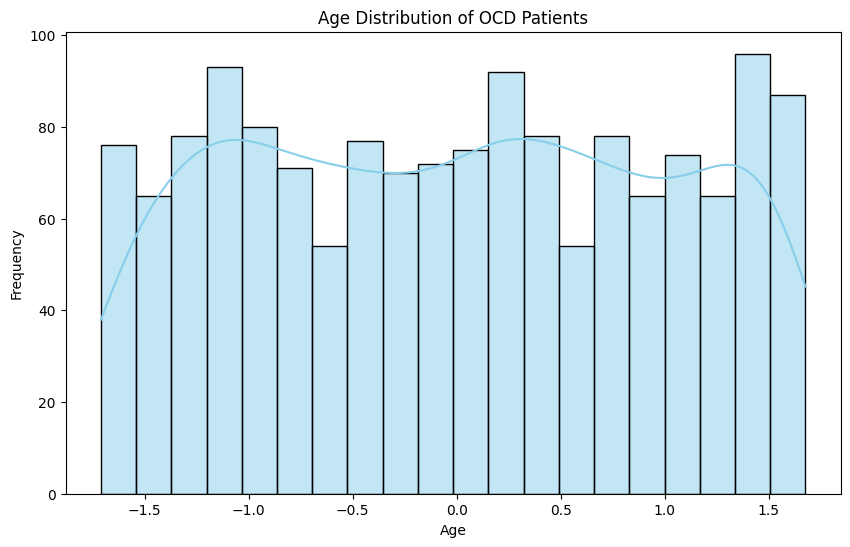

In [21]:
#Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of OCD Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution.png')
plt.show()

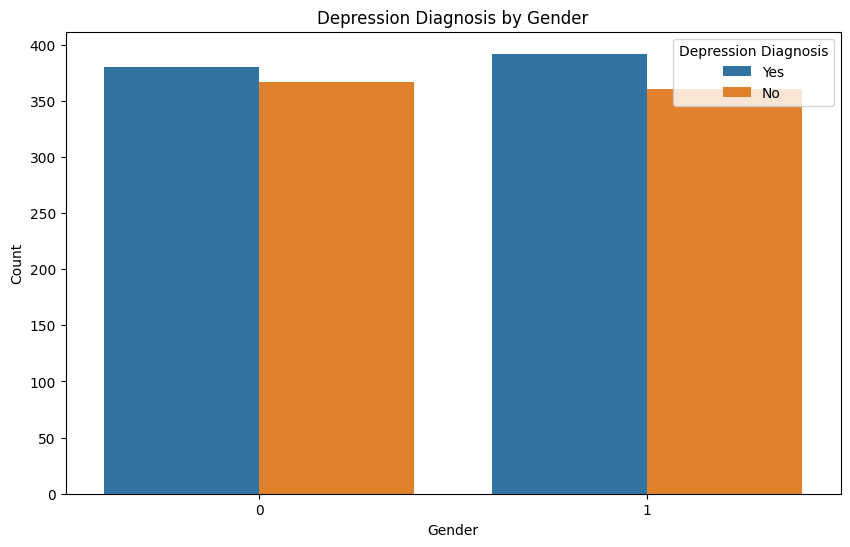

In [22]:
#Depression Diagnosis by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Depression Diagnosis', data=df)
plt.title('Depression Diagnosis by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('depression_by_gender.png')
plt.show()

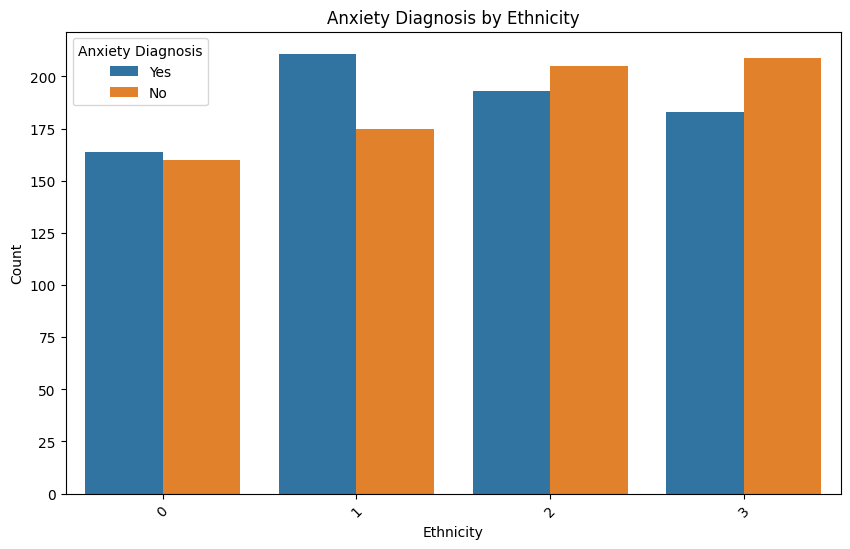

In [23]:
#Anxiety Diagnosis by Ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', hue='Anxiety Diagnosis', data=df)
plt.title('Anxiety Diagnosis by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('anxiety_by_ethnicity.png')
plt.show()

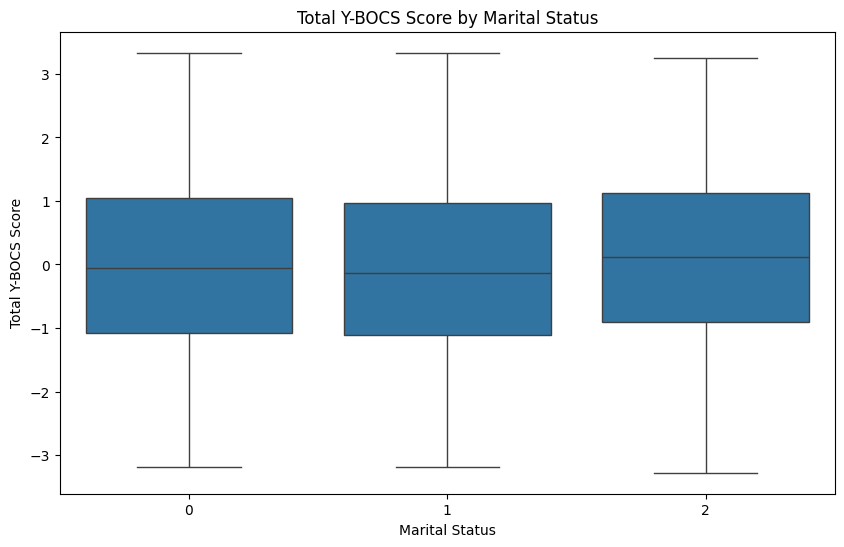

In [24]:
#Total Y-BOCS Score by Marital Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital Status', y='Total Y-BOCS Score', data=df)
plt.title('Total Y-BOCS Score by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Y-BOCS Score')
plt.savefig('ybocs_by_marital_status.png')
plt.show()


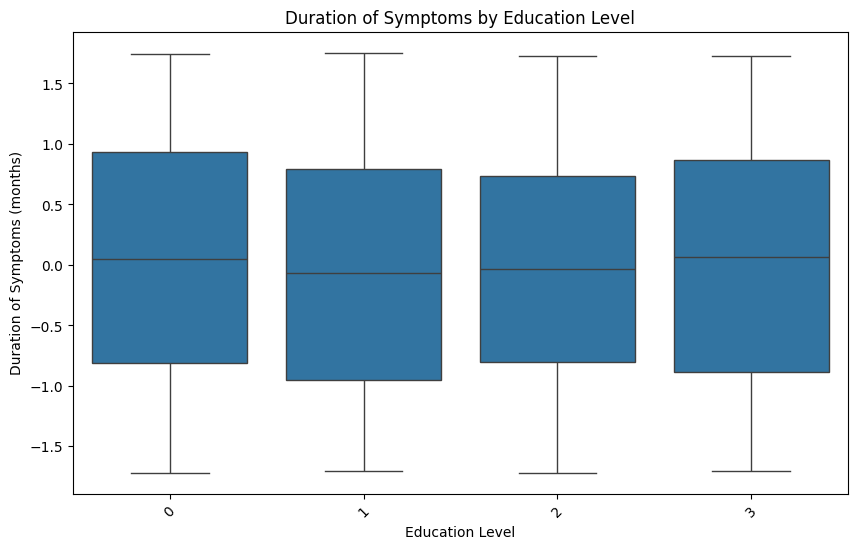

In [25]:
#Duration of Symptoms by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Duration of Symptoms (months)', data=df)
plt.title('Duration of Symptoms by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Duration of Symptoms (months)')
plt.xticks(rotation=45)
plt.savefig('duration_by_education.png')
plt.show()

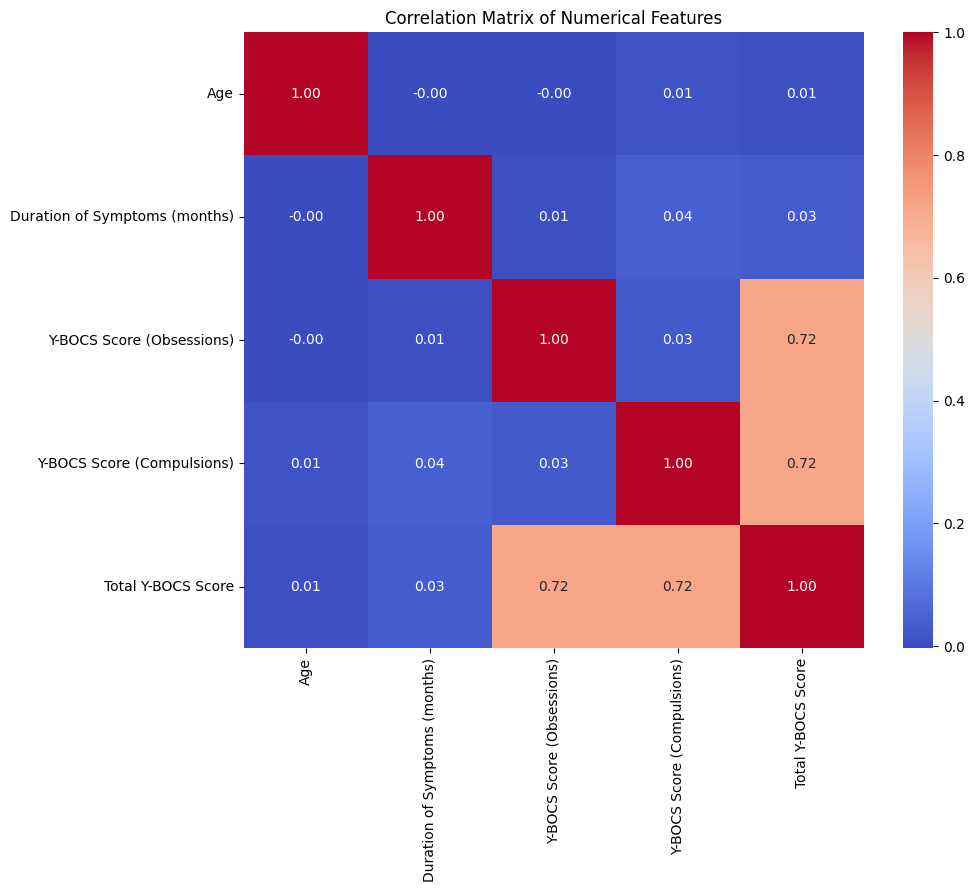

In [26]:
#Correlation Matrix for Numerical Features
numerical_cols = ['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)',
                 'Y-BOCS Score (Compulsions)', 'Total Y-BOCS Score']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix.png')
plt.show()

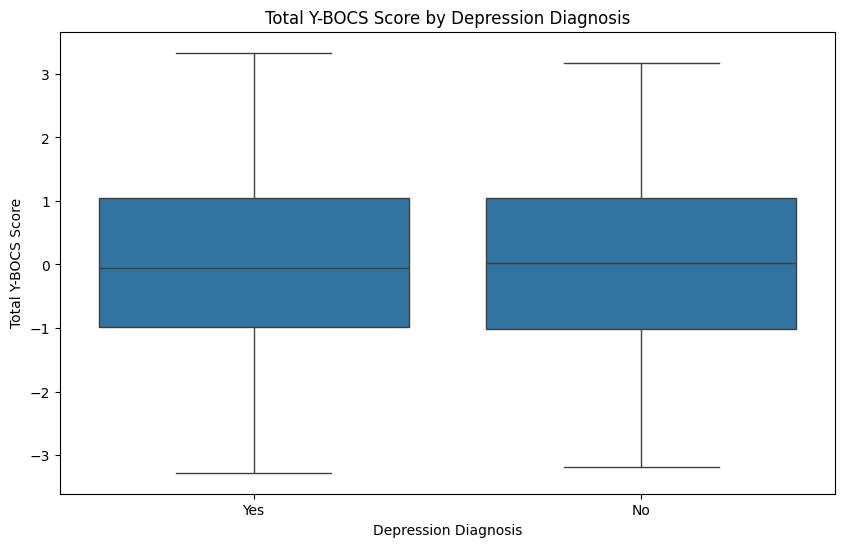

In [27]:
#Depression Diagnosis vs. Total Y-BOCS Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression Diagnosis', y='Total Y-BOCS Score', data=df)
plt.title('Total Y-BOCS Score by Depression Diagnosis')
plt.xlabel('Depression Diagnosis')
plt.ylabel('Total Y-BOCS Score')
plt.savefig('ybocs_by_depression.png')
plt.show()

In [28]:
#Frequency of Obsession Types
print("\nFrequency of Obsession Types:")
print(df['Obsession Type'].value_counts())


Frequency of Obsession Types:
Obsession Type
1    333
0    306
3    303
4    280
2    278
Name: count, dtype: int64


In [29]:
#Frequency of Compulsion Types
print("\nFrequency of Compulsion Types:")
print(df['Compulsion Type'].value_counts())


Frequency of Compulsion Types:
Compulsion Type
4    321
1    316
0    292
3    286
2    285
Name: count, dtype: int64


In [30]:
#Depression and Anxiety Co-occurrence
co_occurrence = pd.crosstab(df['Depression Diagnosis'], df['Anxiety Diagnosis'])
print("\nCo-occurrence of Depression and Anxiety Diagnoses:")
print(co_occurrence)


Co-occurrence of Depression and Anxiety Diagnoses:
Anxiety Diagnosis      No  Yes
Depression Diagnosis          
No                    349  379
Yes                   400  372


In [12]:
# Encode categorical variables
le = LabelEncoder()
for col in ['Gender', 'Ethnicity', 'Marital Status', 'Education Level', 'Previous Diagnoses',
            'Family History of OCD', 'Obsession Type', 'Compulsion Type']:
    df[col] = le.fit_transform(df[col])

In [13]:
# Feature engineering: Years since diagnosis
# Check if the 'OCD Diagnosis Date' column exists before processing
if 'OCD Diagnosis Date' in df.columns:
    # Convert 'OCD Diagnosis Date' to datetime objects
    df['OCD Diagnosis Date'] = pd.to_datetime(df['OCD Diagnosis Date'])
    # Calculate the number of years since the diagnosis date
    df['Years Since Diagnosis'] = (pd.to_datetime('2025-06-02') - df['OCD Diagnosis Date']).dt.days / 365.25
    # Drop the column after use
    df = df.drop(['OCD Diagnosis Date'], axis=1)

In [14]:
# Drop other unnecessary columns, checking if they exist
cols_to_drop = ['Patient ID', 'Medications']
for col_to_drop in cols_to_drop:
    if col_to_drop in df.columns:
        df = df.drop([col_to_drop], axis=1)

In [15]:
# Scale numerical features
scaler = StandardScaler()
# Ensure numerical_cols only contains columns that exist after dropping
numerical_cols = [col for col in ['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)',
                                 'Y-BOCS Score (Compulsions)', 'Years Since Diagnosis'] if col in df.columns]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# The redundant categorical encoding and feature engineering steps from the original second block have been removed.

In [16]:
#Summary Statistics
print("\nSummary Statistics for Numerical Columns:")
print(df[['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)',
         'Y-BOCS Score (Compulsions)']].describe())


Summary Statistics for Numerical Columns:
                Age  Duration of Symptoms (months)  Y-BOCS Score (Obsessions)  \
count  1.500000e+03                   1.500000e+03               1.500000e+03   
mean   7.105427e-18                  -1.065814e-17              -1.894781e-17   
std    1.000334e+00                   1.000334e+00               1.000334e+00   
min   -1.710659e+00                  -1.717745e+00              -1.696117e+00   
25%   -8.785491e-01                  -8.569828e-01              -8.500888e-01   
50%    1.299676e-02                  -1.106129e-02              -4.060934e-03   
75%    8.451062e-01                   8.348602e-01               9.265697e-01   
max    1.677216e+00                   1.754985e+00               1.687995e+00   

       Y-BOCS Score (Compulsions)  
count                1.500000e+03  
mean                -4.263256e-17  
std                  1.000334e+00  
min                 -1.666194e+00  
25%                 -9.021184e-01  
50%        

In [17]:
# Distribution of target variables
print(df['Depression Diagnosis'].value_counts())
print(df['Anxiety Diagnosis'].value_counts())

Depression Diagnosis
Yes    772
No     728
Name: count, dtype: int64
Anxiety Diagnosis
Yes    751
No     749
Name: count, dtype: int64


In [31]:
X = df.drop(['Depression Diagnosis', 'Anxiety Diagnosis'], axis=1)
y_depression = df['Depression Diagnosis']
y_anxiety = df['Anxiety Diagnosis']

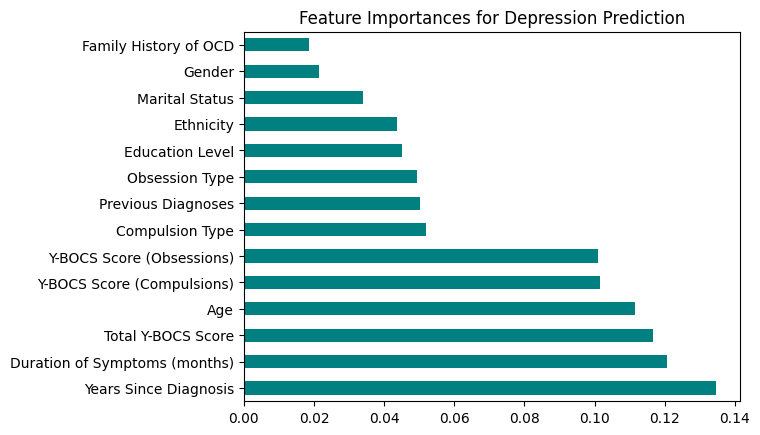

In [32]:
# Train Random Forest to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y_depression)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title('Feature Importances for Depression Prediction')
plt.show()

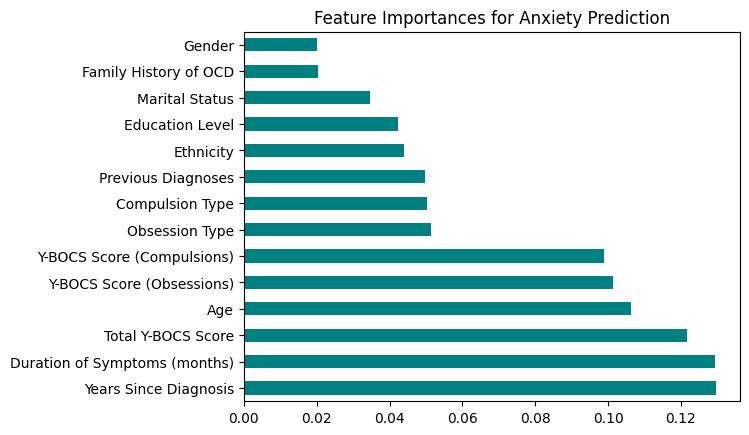

In [33]:
# Repeat for anxiety
rf.fit(X, y_anxiety)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title('Feature Importances for Anxiety Prediction')
plt.show()

In [36]:
# Split data into training and testing sets for depression prediction
X_train, X_test, y_train_dep, y_test_dep = train_test_split(X, y_depression, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_dep:", y_train_dep.shape)
print("Shape of y_test_dep:", y_test_dep.shape)

Shape of X_train: (1200, 14)
Shape of X_test: (300, 14)
Shape of y_train_dep: (1200,)
Shape of y_test_dep: (300,)


In [37]:
# Train Random Forest for depression
rf_dep = RandomForestClassifier(random_state=42)
rf_dep.fit(X_train, y_train_dep)
y_pred_dep = rf_dep.predict(X_test)


In [41]:
# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_dep) # Changed y_train to y_train_dep

RandomForestClassifier(random_state=42)

In [48]:
# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
print("Accuracy:", accuracy_score(y_test_dep, y_pred))

# Explicitly set pos_label to 'Yes'
print("Precision:", precision_score(y_test_dep, y_pred, average='binary', pos_label='Yes'))
print("Recall:", recall_score(y_test_dep, y_pred, average='binary', pos_label='Yes'))
print("F1-Score:", f1_score(y_test_dep, y_pred, average='binary', pos_label='Yes'))





Accuracy: 0.48
Precision: 0.5066666666666667
Recall: 0.4810126582278481
F1-Score: 0.4935064935064935


In [47]:
cv_scores = cross_val_score(rf_model, X, y_depression, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std()))


Cross-Validation Accuracy: 0.50 (+/- 0.02)


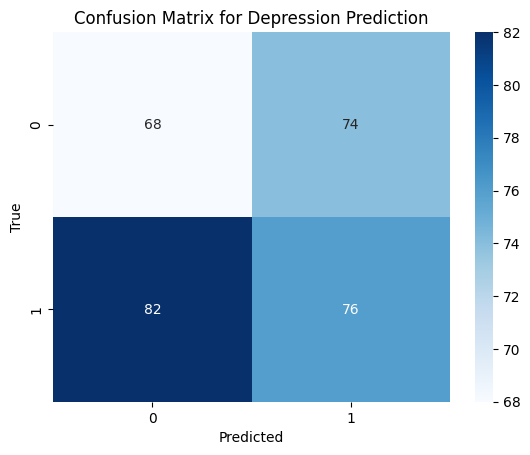

In [45]:
# Confusion matrix
cm = confusion_matrix(y_test_dep, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix for Depression Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

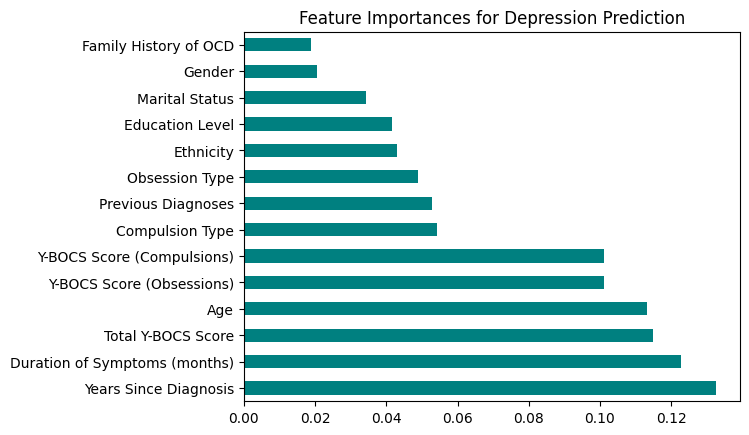

In [49]:
# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title('Feature Importances for Depression Prediction')
plt.show()